# <center>Digit Recognizer</center>



- <a href='#1'>1 Libraries</a>

- <a href='#2'>2 Data Preparation</a> 
    - <a href='#2.1'>2.1 Load Data</a>   
    - <a href='#2.2'>2.2 Check for Missing Values</a>   
    - <a href='#2.3'>2.3 Normalization</a>   
    - <a href='#2.4'>2.4 Reshaping</a>  
    - <a href='#2.5'>2.5 Label Encoding</a> 
    - <a href='#2.6'>2.6 Splitting into training and validation sets</a>  

- <a href='#3'>3.Building CNN Model</a>
    - <a href='#3.1'>3.1 Define the Model</a>   
    - <a href='#3.2'>3.2 Set Optimizer and Compile the Model</a>   
    - <a href='#3.3'>3.3 Fit the Model</a> 

- <a href='#4'>4.Evaluating the Model</a>  
    - <a href='#4.1'>4.1 Acuuracy and Loss of Model</a>   
    - <a href='#4.2'>4.2 Confusion Matirx</a>   


- <a href='#5'>5.Prediction and Submission</a>    
    - <a href='#5.1'>5.1 Predicting and Submitting the Result</a>   
    - <a href='#5.2'>5.2 Saving Model</a>   
    - <a href='#5.3'>5.3 Check submission file</a> 

# <a id='1'>1 Libraries</a> 

In [30]:
# Importing pandas library for use high-performance data structures and data analysis tools.
import pandas as pd 

# Importing numpy for arrays and other types of operations on large numbers of data. 
import numpy as np 

# Importing matplotlib.pyplot for Data-Visualization.
import matplotlib.pyplot as plt 
%matplotlib inline

import itertools

# Importing cv2 library for Image Operations
import cv2

# Importing sklearn modules  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Importing Keras modules 
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.utils.np_utils import to_categorical
from keras.optimizers import RMSprop

# <a id='2'>2 Data Pre-processing</a> 

## <a id='2.1'>2.1 Load Data</a> 

In [2]:
# Formulating the data file into pandas dataframe
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Checking the shape of the dataframe 
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

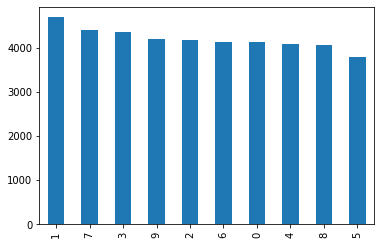

In [5]:
# Creating 'y' for label columns 
y = train_df['label'] 

# Show data as plot
y.value_counts().plot.bar()

## <a id='2.2'>2.2 Check for Missing Values</a> 

In [3]:
# Checking missing values in 'train_df'
train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [4]:
# Checking missing values in 'test_df'
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

## <a id='2.3'>2.3 Normalization</a> 

In [6]:
# normalizing the data
train_df = train_df.drop(['label'], axis=1)
train_df = train_df/255.0
test_df = test_df/255.0

## <a id='2.4'>2.4 Reshaping</a> 

In [7]:
#Reshape images in 3 dimensions (h=28px , w=28px ,channel=1)
train_df = train_df.values.reshape(-1,28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)

## <a id='2.5'>2.5 Label Encoding</a> 

In [10]:
# Encode labels to one hot vectors 
y = to_categorical(y, num_classes = 10)

In [11]:
# checkin y
y[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## <a id='2.6'>2.6 Splitting into training and validation sets</a> 


In [15]:
# Split the train and the validation set for the fitting
X_train, X_val, y_train, y_val = train_test_split(train_df, y, test_size = 0.1, random_state=2)

# show shape of split
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((37800, 28, 28, 1), (37800, 10), (4200, 28, 28, 1), (4200, 10))

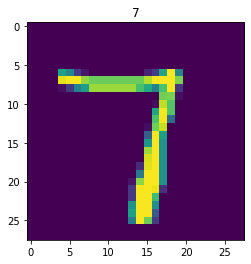

In [16]:
# checking image data and its label
plt.imshow(X_train[1][:,:,0])
plt.title(y_train[1].argmax());

# <a id='3'>3 Building a CNN-Model</a> 

## <a id='3.1'>3.1 Define the Model</a> 

In [18]:
# Creating the CNN model 
model = Sequential()

# Layer1
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Layer2
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# Fully-Connected Layer
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Check Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)         

## <a id='3.2'>3.2 Set Optimizer and Compile the Model</a> 

In [21]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

In [22]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## <a id='3.3'>3.3 Fit the Model</a> 

In [23]:
model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/10
378/378 [==============================] - 182s 478ms/step - loss: 0.5500 - accuracy: 0.8220 - val_loss: 0.0553 - val_accuracy: 0.9814
Epoch 2/10
378/378 [==============================] - 226s 598ms/step - loss: 0.0794 - accuracy: 0.9769 - val_loss: 0.0569 - val_accuracy: 0.9802
Epoch 3/10
378/378 [==============================] - 244s 646ms/step - loss: 0.0582 - accuracy: 0.9818 - val_loss: 0.0355 - val_accuracy: 0.9895
Epoch 4/10
378/378 [==============================] - 238s 629ms/step - loss: 0.0472 - accuracy: 0.9845 - val_loss: 0.0468 - val_accuracy: 0.9876
Epoch 5/10
378/378 [==============================] - 219s 580ms/step - loss: 0.0374 - accuracy: 0.9894 - val_loss: 0.0314 - val_accuracy: 0.9912
Epoch 6/10
378/378 [==============================] - 205s 544ms/step - loss: 0.0317 - accuracy: 0.9892 - val_loss: 0.0320 - val_accuracy: 0.9910
Epoch 7/10
378/378 [==============================] - 220s 583ms/step - loss: 0.0328 - accuracy: 0.9909 - val_loss: 0.0224 -

# <a id='4'>4 Model Evaluation</a> 

## <a id='4.1'>4.1 Accuracy and Loss of Model </a> 

In [24]:
# Printing Accuracy and Loss
model_loss, Model_acc = model.evaluate(X_val, y_val)
model_loss, Model_acc

132/132 [==============================] - 5s 37ms/step - loss: 0.0277 - accuracy: 0.9938


(0.027675863355398178, 0.9938095211982727)

## <a id='4.2'>4.2 Confusion Matrix </a> 

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

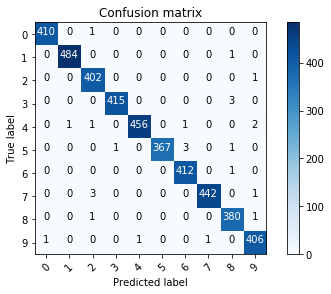

In [32]:
# Predict the values from the validation dataset
y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
y_pred = np.argmax(y_pred,axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 

# plot the confusion matrix
df_matrix = confusion_matrix(y_true, y_pred) 
plot_confusion_matrix(cf_matrix, classes = range(10)) 

# <a id='5'>5 Prediction and Submission</a> 

## <a id='5.1'>5.1 Predicting and Submitting the Result</a> 

In [36]:
# predict results
results = model.predict(test_df)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)  
submission.to_csv("submission.csv",index=False)

## <a id='5.2'>5.2 Saving Model </a> 

In [34]:
# Saving the model in name of 'digit_recognizer_model'
model.save('digit_recognizer_model.h5')

## <a id='5.3'>5.3 Check submission file </a> 

In [37]:
# formulating the submission.csv into dataframe
submission_df = pd.read_csv('submission.csv')
submission_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
